# Области применимости линейных моделей

Сложно представить себе ситуацию, в которой мы берём данные, обучаем линейную модель и получаем хорошее качество работы.
В линейной модели предполагается конкретный вид зависимости~--- а именно, что каждый признак линейно влияет на целевую переменную,
и что целевая переменная не зависит от каких-либо комбинаций признаков.
Вряд ли это будет выполнено по умолчанию, поэтому обычно данные требуют специальной подготовки, чтобы линейные модели
оказались адекватными задаче.
Приведём несколько примеров.



## Категориальные признаки.
Представим себе задачу определения стоимости квартиры по её характеристикам.
Одним из важных признаков является район, в котором находится квартира.
Этот признак является категориальным --- его значения нельзя сравнивать между собой на больше/меньше,
их нельзя складывать или вычитать.
Непосредственно такие признаки нельзя использовать в линейных моделях, но есть
достаточно распространённый способ их преобразования.

Допустим, категориальный признак $f_j(x)$ принимает значения из множества $C = \{c_1, \dots, c_m\}$.
Заменим его на $m$ бинарных признаков~$b_1(x), \dots, b_m(x)$, каждый из которых
является индикатором одного из возможных категориальных значений:
$$
    b_i(x) = [f_j(x) = c_i].
$$
Такой подход называется one-hot кодированием.

Отметим, что признаки $b_1(x), \dots, b_m(x)$ являются линейно зависимыми:
для любого объекта выполнено
$$
    b_1(x) + \dots + b_m(x) = 1.
$$
Чтобы избежать этого, можно выбрасывать один из бинарных признаков.
Впрочем, такое решение имеет и недостатки --- например, если на тестовой выборке
появится новая категория, то её как раз можно закодировать с помощью нулевых бинарных признаков;
при удалении одного из них это потеряет смысл.

Вернёмся к задаче про стоимость квартиры.
Если мы применим линейную модель к данным после one-hot кодирования признака о районе (допустим, это $f(x)$), то получится
такая формула:
$$
    a(x)
    =
    w_1 [f(x) = c_1]
    +
    \dots
    +
    w_m [f(x) = c_m]
    +
    \{
        \text{взаимодействие с другими признаками}
    \}.
$$
Такая зависимость кажется логичной~--- каждый район задаёт некоторый базовый уровень
стоимости (например, для района $c_1$ имеем базовую цену $w_1$),
а остальные факторы корректируют его.

## Работа с текстами.

Перейдём к предсказанию стоимости квартиры по её текстовому описанию.
Есть простой способ кодирования, который называется *мешок слов (bag of words)*.

Найдём все слова, которые есть в нашей выборке текстов, и пронумеруем их: $\{c_1, \dots, c_m\}$.
Будем кодировать текст $m$ признаками $b_1(x), \dots, b_m(x)$, где $b_j(x)$ равен
количеству вхождений слова $c_j$ в текст.
Линейная модель над такими признаками будет иметь вид
$$
    a(x)
    =
    w_1 b_1(x)
    +
    \dots
    +
    w_m b_m(x)
    +
    \dots,
$$
и такой вид тоже кажется разумным.
Каждое вхождение слова $c_j$ меняет прогноз стоимости на $w_j$.
В самом деле, можно ожидать, что слово <<престижный>> скорее говорит о том,
что квартира дорогая, а слово <<плохой>> вряд ли будут использовать при описании
приличной квартиры.


## Бинаризация числовых признаков.

Наконец, подумаем о предсказании стоимости квартиры по расстоянию до ближайшей станции метро $x_j$.
Может оказаться, что самые дорогие квартиры расположены где-то в 5-10 минутах ходьбы от метро,
а те, что ближе или дальше, стоят не так дорого.
В этом случае зависимость целевой переменной от признака не будет линейной.
Чтобы сделать линейную модель подходящей, мы можем бинаризовать признак.
Для этого выберем некоторую сетку точек $\{t_1, \dots, t_m\}$.
Это может быть равномерная сетка между минимальным и максимальным значением признака или,
например, сетка из эмпирических квантилей.
Добавим сюда точки $t_0 = -\infty$ и $t_{m+1} = +\infty$.
Новые признаки зададим как
$$
    b_i(x)
    =
    [t_{i - 1} < x_j \leq t_{i}],
    \quad
    i = 1, \dots, m+1.
$$

Линейная модель над этими признаками будет выглядеть как
$$
    a(x)
    =
    w_1 [t_{0} < x_j \leq t_{1}]
    +
    \dots
    +
    w_{m+1} [t_{m} < x_j \leq t_{m+1}]
    +
    \dots,
$$
то есть мы найдём свой прогноз стоимости квартиры для каждого интервала расстояния до метро.
Такой подход позволит учесть нелинейную зависимость между признаком и целевой переменной.

## Измерение ошибки в задачах регрессии

Чтобы обучать регрессионные модели, нужно определиться, как именно измеряется качество предсказаний.
Будем обозначать через $y$ значение целевой переменной, через $a$ --- прогноз модели.
Рассмотрим несколько способов оценить отклонение $L(y, a)$ прогноза от истинного ответа.

### MSE и $R^2$.

Основной способ измерить отклонение --- посчитать квадрат разности:
$$
    L(y, a) = (a - y)^2
$$
Благодаря своей дифференцируемости эта функция наиболее часто используется в задачах регрессии.
Основанный на ней функционал называется среднеквадратичным отклонением (mean squared error, MSE):
$$
    \text{MSE}(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell} \left(
        a(x_i) - y_i
    \right)^2.
$$
Отметим, что величина среднеквадратичного отклонения плохо интерпретируется,
поскольку не сохраняет единицы измерения --- так, если мы предсказываем цену
в рублях, то MSE будет измеряться в квадратах рублей.
Чтобы избежать этого, используют корень из среднеквадратичной ошибки (root mean squared error, RMSE):
$$
    \text{RMSE}(a, X)
    =
    \sqrt{
        \frac{1}{\ell}
        \sum_{i = 1}^{\ell} \left(
            a(x_i) - y_i
        \right)^2
    }.
$$

Среднеквадратичная ошибка подходит для сравнения двух моделей
или для контроля качества во время обучения,
но не позволяет сделать выводы о том, насколько хорошо данная модель
решает задачу.
Например, $\text{MSE}=10$ является очень плохим показателем,
если целевая переменная принимает значения от 0 до 1,
и очень хорошим, если целевая переменная лежит в интервале $(10000, 100000)$.
В таких ситуациях вместо среднеквадратичной ошибки полезно использовать **коэффициент детерминации**
(или коэффициент $R^2$):
$$
    R^2(a, X)
    =
    1
    -
    \frac{
        \sum_{i = 1}^{\ell} (a(x_i) - y_i)^2
    }{
        \sum_{i = 1}^{\ell} (y_i - \bar y)^2
    },
$$
где $\bar y = \frac{1}{\ell} \sum_{i = 1}^{\ell} y_i$ --- среднее значение целевой переменной.
Коэффициент детерминации измеряет долю дисперсии, объяснённую моделью, в общей дисперсии
целевой переменной.
Фактически, данная мера качества --- это нормированная среднеквадратичная ошибка.
Если она близка к единице, то модель хорошо объясняет данные,
если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.


## MAE.

Заменим квадрат отклонения на модуль:
$$
    L(y, a) = |a - y|
$$
Соответствующий функционал называется средним абсолютным отклонением (mean absolute error, MAE):
$$
    \text{MAE}(a, X)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell} \left|
        a(x_i) - y_i
    \right|.
$$

Модуль отклонения не является дифференцируемым, но при этом менее чувствителен к выбросам.
Квадрат отклонения, по сути, делает особый акцент на объектах с сильной ошибкой,
и метод обучения будет в первую очередь стараться уменьшить отклонения на таких объектах.
Если же эти объекты являются выбросами (то есть значение целевой переменной на них либо ошибочно,
либо относится к другому распределению и должно быть проигнорировано),
то такая расстановка акцентов приведёт к плохому качеству модели.
Модуль отклонения в этом смысле гораздо более терпим к сильным ошибкам.


```
|  y  | a_1(x) | (a_1(x) - y)^2 | |a_1(x) - y| | a_2(x) | (a_2(x) - y)^2 | |a_2(x) - y| |
|-----|--------|---------------|-------------|--------|---------------|-------------|
|  1  |   2    |       1       |      1      |   4    |       9       |      3      |
|  2  |   1    |       1       |      1      |   5    |       9       |      3      |
|  3  |   2    |       1       |      1      |   6    |       9       |      3      |
|  4  |   5    |       1       |      1      |   7    |       9       |      3      |
|  5  |   6    |       1       |      1      |   8    |       9       |      3      |
| 100 |   7    |      8649     |     93      |  10    |      8100     |     90      |
|  7  |   6    |       1       |      1      |  10    |       9       |      3      |
|     |        |  MSE = 1236   |  MAE = 14.14 |        |  MSE = 1164   |  MAE = 15.43 |
```


In [1]:
import pandas as pd

# Создание данных для таблицы
data = {
    'y': [1, 2, 3, 4, 5, 100, 7],
    'a1(x)': [2, 1, 2, 5, 6, 7, 6],
    '(a1(x) - y)^2': [1, 1, 1, 1, 1, 8649, 1],
    '|a1(x) - y|': [1, 1, 1, 1, 1, 93, 1],
    'a2(x)': [4, 5, 6, 7, 8, 10, 10],
    '(a2(x) - y)^2': [9, 9, 9, 9, 9, 8100, 9],
    '|a2(x) - y|': [3, 3, 3, 3, 3, 90, 3]
}

# Создание DataFrame из данных
df = pd.DataFrame(data)

# Вывод таблицы
df

,y,a1(x),(a1(x) - y)^2,|a1(x) - y|,a2(x),(a2(x) - y)^2,|a2(x) - y|
0,1,2,1,1,4,9,3
1,2,1,1,1,5,9,3
2,3,2,1,1,6,9,3
3,4,5,1,1,7,9,3
4,5,6,1,1,8,9,3
5,100,7,8649,93,10,8100,90
6,7,6,1,1,10,9,3



Рассмотрим для примера данные из таблицы выше.
Один из объектов --- выброс, значение целевой переменной на нём радикально отличается
от остальных объектов.
Модель $a_1(x)$ почти не ошибается на <<нормальных>> объектах,
но сильно ошибается на выбросе.
Модель $a_2(x)$ подгоняется под выброс ценой ухудшения прогнозов на остальных объектах.
Видно, что первая модель оказывается лучше с точки зрения MAE, но хуже с точки зрения MSE.
Это логично --- у квадратичной функции потерь штраф за ошибку растёт нелинейно с ростом отклонения прогноза от ответа,
а для абсолютной функции потерь равносильно снижение отклонения на одну и ту же величину для нормального объекта и для выброса.
Заметим, что такая особенность MAE пропадёт, если в выборке будет много выбросов.
Скажем, если будет около половины объектов с аномальными значениями целевой переменной, то вполне
может стать выгоднее оптимизировать отклонение именно на них.

Приведём ещё одно объяснение того, почему модуль отклонения устойчив к выбросам,
на простом примере.
Допустим, все $\ell$ объектов выборки имеют одинаковые признаковые описания, но разные
значения целевой переменной $y_1, \dots, y_\ell$.
В этом случае модель должна на всех этих объектах выдать один и тот же ответ.
Если мы выбрали MSE в качестве функционала ошибки, то получаем следующую задачу:
$$
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell} \left(
        a - y_i
    \right)^2
    \to
    \min_a
$$



Легко показать, что минимум достигается на среднем значении всех ответов:
$$
    a_{\text{MSE}}^*
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        y_i.
$$

Если один из ответов на порядки отличается от всех остальных (то есть является выбросом),
то среднее будет существенно отклоняться в его сторону.

Рассмотрим теперь ту же ситуацию, но с функционалом MAE:
$$
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell} \left|
        a - y_i
    \right|
    \to
    \min_a
$$

Теперь решением будет медиана ответов:
$$
    a_{\text{MAE}}^*
    =
    \text{median}
        \{y_i\}_{i = 1}^{\ell}.
$$

Небольшое количество выбросов никак не повлияет на медиану --- она существенно
более устойчива к величинам, выбивающимся из общего распределения.


В заключение отметим одну проблему, связанную с абсолютной функцией потерь.
Рассмотрим производные для неё и квадратичной функции:
$$
    \frac{\partial}{\partial a} |a - y| = sign (a - y), \quad a \neq y; \\
$$
$$
  \frac{\partial}{\partial a} (a - y)^2 = 2 (a - y).
$$
Дальше в курсе мы будем изучать градиентные методы обучения,
где параметры модели постепенно изменяются на основе значений производных функции потерь.
Видно, что производная абсолютной функции потерь не зависит от близости прогноза к правильному ответу,
по её значению нельзя понять, насколько мы близки к оптимальному прогнозу.
Из-за этого при оптимизации MAE можно легко <<перескочить>> экстремум.
Поэтому, как правило, использование этой функции потерь приводит к более долгой и сложной
процедуре обучения.

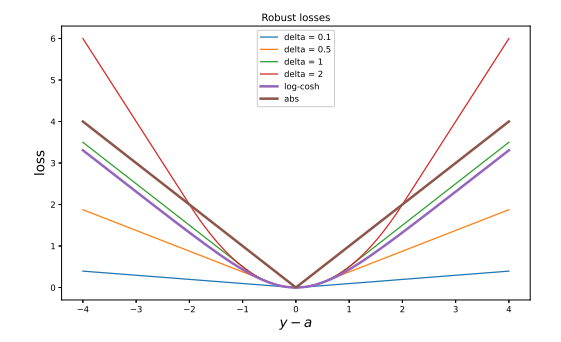

Рис. 1. Функция потерь Хубера и Log-Cosh

## Huber loss.

Выше мы обсудили, что абсолютная функция потерь более устойчива к выбросам,
а квадратичная функция лучше с точки зрения оптимизации.
Почему бы не попробовать их объединить?
Для прогнозов, близких к ответу, нам бы пригодились свойства гладкой квадратичной функции,
а для плохих прогнозов важнее свойства абсолютного отклонения.
Одним из вариантов такого объединения является функция потерь Хубера:
$$
    L_\delta(y, a)
    =
    \left\{
    \begin{aligned}
        &\frac12 (y - a)^2, \quad |y - a| < \delta \\
        &\delta \left(
            |y - a| - \frac12 \delta
        \right), \quad |y - a| \geq \delta
    \end{aligned}
    \right.
$$

У этой функции потерь есть параметр $\delta$, который регулирует, что мы считаем за выбросы.
Если сделать этот параметр маленьким, то функция будет вести себя квадратично только в маленькой окрестности нуля.
Если же увеличивать $\delta$, то даже для значительных отклонений $(a - y)$ штраф будет вести себя квадратично,
и при обучении мы будем делать большой акцент на их уменьшение.
Данный параметр надо подбирать, поскольку он может сильно повлиять на решение.

Также легко, что при $\delta \to 0$ функция потерь Хубера вырождается в абсолютную функцию потерь,
а при $\delta \to \infty$ --- в квадратичную.

## Log-Cosh

У функции потерь Хубера есть недостаток: её вторая производная имеет разрывы.
Такого недостатка нет у функции потерь log-cosh:
$$
    L(y, a)
    =
    \log \cosh(a - y).
$$

Как и в случае с функцией потерь Хубера, для маленьких отклонений здесь имеет место
квадратичное поведение, а для больших --- линейное.

Обсужденные нами <<гибридные>> функции потерь изображены на рис. 1.
Отметим, что существуют достаточно широкие обобщения этих функций потерь \cite{barron19robust}.


## MSLE.

Перейдём теперь к логарифмам ответов и прогнозов:
$$
    L(y, a) = (\log(a + 1) - \log(y + 1))^2
$$
Соответствующий функционал называется среднеквадратичной логарифмической ошибкой (mean
squared logarithmic error, MSLE).
Данная метрика подходит для задач с неотрицательной целевой переменной и неотрицательными прогнозами модели.
За счёт логарифмирования ответов и прогнозов мы скорее штрафуем за отклонения
в порядке величин, чем за отклонения в их значениях.
Также следует помнить, что логарифм не является симметричной функцией,
и поэтому данная функция потерь штрафует заниженные прогнозы сильнее,
чем завышенные.

## MAPE и SMAPE.

В задачах прогнозирования нередко измеряется относительная ошибка.
Во-первых, это удобно для интерпретации --- легко понять, что <<ошибка 50\%>>
соответствует отклонению в полтора раза от целевой переменной.
Во-вторых, это позволяет работать с разными мастштабами.
Например, мы можем решать задачу прогнозирования спроса на товары в магазине,
и какие-то товары могут продаваться штуками, а какие-то --- тысячами.
Чтобы при усреднении ошибок более популярные товары не оказывали
большее влияние на результат, следует использовать функции потерь, не зависящие от масштаба.
Типичный пример относительной функции потерь:
$$
    L(y, a) = \left| \frac{y - a}{y} \right|
$$
Соответствующий функционал называется средней абсолютной процентной ошибкой (mean
absolute percentage error, MAPE).

У MAPE есть проблем с несимметричностью: скажем, если $y = 1$ и все прогнозы неотрицательные,
то максимальная ошибка при занижении прогноза ($a < y$) равна единице, а ошибка при
завышении прогноза ($a > y$) никак не ограничена сверху.
Это исправляется в симметричной модификации (symmetric mean absolute percentage error, SMAPE):
$$
    L(y, a) = \frac{|y - a|}{(|y| + |a|) / 2}
$$


## Квантильная функция потерь.

В некоторых задачах цены занижения и завышения прогнозов могут отличаться друг от друга.
Например, при прогнозировании спроса на товары интернет-магазина гораздо опаснее заниженные
предсказания, поскольку они могут привести к потере клиентов.
Завышенные же прогнозы приводят лишь к издержкам на хранение товара на складе.
Функционал в этом случае можно записать как
$$
    Q(a, X^\ell)
    =
    \sum_{i = 1}^{\ell}
        \rho_\tau(y_i - a(x_i)),
$$
где
$$
    \rho_\tau(z)
    =
    (\tau - 1) [z < 0] z
    +
    \tau [z \geq 0] z
    =
    (\tau - \frac{1}{2})z + \frac{1}{2} |z|,
$$
а параметр $\tau$ лежит на отрезке $[0, 1]$ и определяет
соотношение важности занижения и завышения прогноза.
Чем больше здесь $\tau$, тем выше штраф за занижение прогноза.

Обсудим вероятностный смысл данного функционала.
Будем считать, что в каждой точке $x \in X$ пространства объектов
задано вероятностное распределение $p(y | x)$ на возможных ответах для данного объекта.
Такое распределение может возникать, например, в задаче предсказания кликов по рекламным баннерам:
один и тот же пользователь может много раз заходить на один и тот же сайт и видеть данный баннер;
при этом некоторые посещения закончатся кликом, а некоторые --- нет.

Известно, что при оптимизации квадратичного функционала алгоритм $a(x)$
будет приближать условное матожидание ответа в каждой точке пространства
объектов: $a(x) \approx E [y | x]$;
если же оптимизировать среднее абсолютное отклонение, то итоговый алгоритм
будет приближать медиану распределения: $a(x) \approx \text{median} [p(y| x)]$.
Рассмотрим теперь некоторый объект $x$ и условное распределение $p(y | x)$.
Найдем  число $q$, которое будет оптимальным с точки зрения нашего функционала:
$$
    Q = \int_Y \rho_\tau(y - q) p(y | x) dy.
$$
Продифференцируем его (при этом необходимо воспользоваться правилами
дифференцирования интегралов, зависящих от параметра):
$$
    \frac{\partial Q}{\partial q}
    =
    (1 - \tau) \int_{-\infty}^{q} p(y | x) dy
    -
    \tau \int_{q}^{\infty} p(y | x) dy
    =
    0.
$$
Получаем, что
$$
    \frac{\tau}{1 - \tau}
    =
    \frac{
        \int_{-\infty}^{q} p(y | x) dy
    }{
        \int_{q}^{\infty} p(y | x) dy
    }.
$$
Данное уравнение будет верно, если $q$ будет равно $\tau$-квантили распределения $p(y | x)$.
Таким образом, использование функции потерь $\rho_\tau(z)$ приводит к тому,
что алгоритм $a(x)$ будет приближать $\tau$-квантиль распределения ответов в каждой точке
пространства объектов.

